# Assignment: Exercise 08: Fashion-mnist classification

The traditional MNIST dataset is considered to be too easy to be used as a case for evaluating model performance. A new dataset with more complex images has been made available and is getting popular. See https://github.com/zalandoresearch/fashion-mnist for details about the data set.

Download fashion-mnist and train a sequential dense model for it (note that fashion MNIST is available in keras.datasets like the original MNIST). Make sure to study the data, plot some images from it etc. to get familiar with the data set. Compare the accuracy you achieve vs. the accuracy achieved in standard mnist example. Analyze model behaviour by plotting loss/accuracy diagrams and confusion matrix.
Note: deep doesn’t mean 100’s of layers. Start with small network.

In [2]:
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import argmax
from keras.datasets import mnist

In [3]:
def plot_loss_function(hist):
    plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'], 'b')
    plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'], 'r')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training loss", "Validation loss"])
    plt.title("Loss function diagram")
    plt.show()
    
def plot_accuracy_function(hist):
    plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['acc'], 'b')
    plt.plot(range(1, len(hist.history['val_acc']) + 1), hist.history['val_acc'], 'r')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training accuracy", "Validation accuracy"])
    plt.title("Accuracy function diagram")
    plt.show()

# Download and explore Fashion-mnist dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)


Check feature values

In [5]:
print("x min: " + str(x_train.reshape(-1).min()))
print("x max: " + str(x_train.reshape(-1).max()))

x min: 0
x max: 255


Check distribution of labels

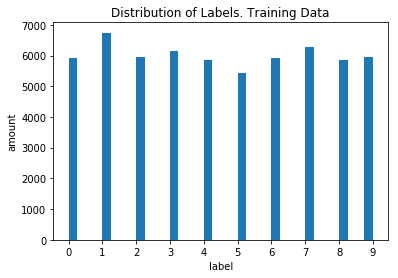

In [6]:
plt.hist(y_train, bins='auto')
plt.xticks(range(10))
plt.title("Distribution of Labels. Training Data")
plt.xlabel("label")
plt.ylabel("amount");

Visualize example image data

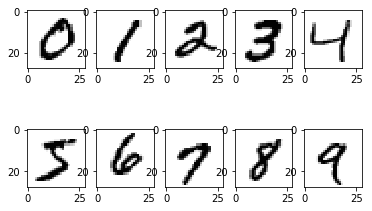

In [7]:
fig, ax = plt.subplots(2,5)
ax = ax.flatten()

for i in range(10):
    im_idx = np.argwhere(y_train == i).reshape(-1)[0]
    plottable_image = np.reshape(x_train[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')

Let's normalize our data

In [8]:
scaled_x_train = x_train.reshape(x_train.shape[0], -1) / 255
scaled_x_test = x_test.reshape(x_test.shape[0], -1) / 255

y_train_1hot = keras.utils.to_categorical(y_train)
y_test_1hot = keras.utils.to_categorical(y_test)

print("scaled_x_train.shape", scaled_x_train.shape)
print("y_train_1hot.shape", y_train_1hot.shape)
print("scaled_x_test.shape", scaled_x_test.shape)
print("y_test_1hot.shape", y_test_1hot.shape)

scaled_x_train.shape (60000, 784)
y_train_1hot.shape (60000, 10)
scaled_x_test.shape (10000, 784)
y_test_1hot.shape (10000, 10)


# 1-layer network

## Build&train model. 1-layer network

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(scaled_x_train.shape[1],), activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Train model

In [10]:
hist = model.fit(scaled_x_train, y_train_1hot, epochs=100, batch_size=64, validation_data=(scaled_x_test, y_test_1hot))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/step - loss: 1.0167 - acc: 0.7617 - val_loss: 0.6078 - val_acc: 0.8616
Epoch 2/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.5564 - acc: 0.8643 - val_loss: 0.4794 - val_acc: 0.8838
Epoch 3/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.4745 - acc: 0.8786 - val_loss: 0.4281 - val_acc: 0.8911
Epoch 4/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.4350 - acc: 0.8847 - val_loss: 0.3992 - val_acc: 0.8950
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.4106 - acc: 0.8899 - val_loss: 0.3808 - val_acc: 0.8992
Epoch 6/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3935 - acc: 0.8932 - val_loss: 0.3669 - val_acc: 0.9026
Epoch 7/100
60000/60000 [==============================] - 1s 16us/step - 

Epoch 58/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2833 - acc: 0.9214 - val_loss: 0.2799 - val_acc: 0.9213
Epoch 59/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2828 - acc: 0.9213 - val_loss: 0.2796 - val_acc: 0.9212
Epoch 60/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2823 - acc: 0.9219 - val_loss: 0.2798 - val_acc: 0.9212
Epoch 61/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.2820 - acc: 0.9217 - val_loss: 0.2791 - val_acc: 0.9219
Epoch 62/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.2815 - acc: 0.9219 - val_loss: 0.2789 - val_acc: 0.9213
Epoch 63/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2811 - acc: 0.9220 - val_loss: 0.2786 - val_acc: 0.9221
Epoch 64/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.2807 - acc: 0.9220 - val_loss: 0.2785 - val_acc: 0.9222
Epoch 65/100
60000/60000 [=

## Model behaviour. 1-layer network

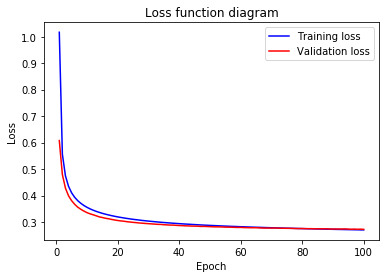

In [11]:
plot_loss_function(hist)

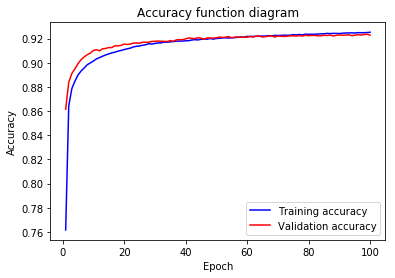

In [12]:
plot_accuracy_function(hist)

In [13]:
print("Accuracy train: " + str(hist.history['acc'][-1]))
print("Accuracy validation: " + str(hist.history['val_acc'][-1]))

Accuracy train: 0.9253
Accuracy validation: 0.9229999780654907


In [14]:
print("Confusion matrix. Training data")
y_train_predictions = argmax(model.predict(scaled_x_train), 1)
print(confusion_matrix(y_train_predictions, y_train))

print("\nConfusion matrix. Testing data")
y_test_predictions = argmax(model.predict(scaled_x_test), 1)
print(confusion_matrix(y_test_predictions, y_test))

Confusion matrix. Training data
[[5742    1   29   18   14   65   30   20   27   29]
 [   1 6558   59   24   32   30   16   31  114   32]
 [  20   34 5375  133   32   48   40   74   62   16]
 [  10   18   82 5513    7  176    2   18  137   78]
 [  13    6   83    6 5460   62   46   51   29  156]
 [  40   29   27  190    3 4742   67    9  137   35]
 [  41    8   68   24   57   95 5679    4   44    2]
 [   7   16   84   65   17   22    3 5876   17  178]
 [  44   63  128  105   36  127   33   13 5210   45]
 [   5    9   23   53  184   54    2  169   74 5378]]

Confusion matrix. Testing data
[[ 959    0    5    3    1    9   12    1    7   10]
 [   0 1110    8    0    2    3    3    6    7    7]
 [   3    2  926   22    4    3    4   22    7    2]
 [   2    2   14  919    1   34    2    9   22   10]
 [   0    0   10    0  914    9    9    6    9   30]
 [   4    1    6   26    0  769   11    1   25    7]
 [   9    4   11    2   12   19  911    0   10    0]
 [   1    2    9   12    3    7   

# Dense network

## Build&train model. Dense network

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, input_shape=(scaled_x_test.shape[1],), activation='relu'))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                12550     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 530,810
Trainable params: 530,810
Non-trainable params: 0
_________________________________________________________________


Train model

In [16]:
hist = model.fit(scaled_x_train, y_train_1hot, epochs=50, batch_size=64, validation_data=(scaled_x_test, y_test_1hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.7896 - acc: 0.7943 - val_loss: 0.3411 - val_acc: 0.9052
Epoch 2/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.3104 - acc: 0.9120 - val_loss: 0.2597 - val_acc: 0.9265
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2500 - acc: 0.9282 - val_loss: 0.2242 - val_acc: 0.9351
Epoch 4/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2135 - acc: 0.9389 - val_loss: 0.1979 - val_acc: 0.9420
Epoch 5/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1866 - acc: 0.9469 - val_loss: 0.1711 - val_acc: 0.9497
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1647 - acc: 0.9529 - val_loss: 0.1547 - val_acc: 0.9545
Epoch 7/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1474 - acc: 0.9582 - val_loss: 0.1401 - val_acc

## Model behaviour. Dense network

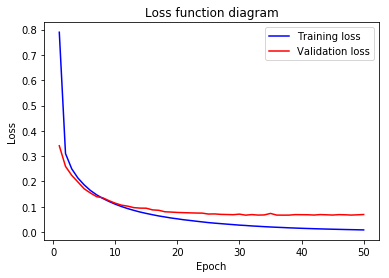

In [17]:
plot_loss_function(hist)

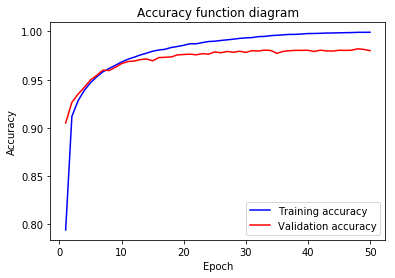

In [18]:
plot_accuracy_function(hist)

In [19]:
print("Accuracy train: " + str(hist.history['acc'][-1]))
print("Accuracy validation: " + str(hist.history['val_acc'][-1]))

Accuracy train: 0.99918336
Accuracy validation: 0.9800999760627747


In [20]:
print("Confusion matrix. Training data")
y_train_predictions = argmax(model.predict(scaled_x_train), 1)
print(confusion_matrix(y_train_predictions, y_train))

print("\nConfusion matrix. Testing data")
y_test_predictions = argmax(model.predict(scaled_x_test), 1)
print(confusion_matrix(y_test_predictions, y_test))

Confusion matrix. Training data
[[5922    0    0    0    0    0    1    0    0    0]
 [   0 6737    2    0    1    1    0    6    2    1]
 [   0    0 5955    0    0    0    0    0    0    0]
 [   0    0    0 6129    0    0    0    0    0    0]
 [   0    3    0    0 5839    0    0    1    0    2]
 [   0    0    0    0    0 5420    1    0    0    0]
 [   0    0    0    0    0    0 5916    0    1    0]
 [   0    1    1    0    1    0    0 6258    0    1]
 [   1    1    0    1    0    0    0    0 5848    2]
 [   0    0    0    1    1    0    0    0    0 5943]]

Confusion matrix. Testing data
[[ 970    0    3    1    1    2    4    1    4    2]
 [   1 1124    3    0    0    0    2    4    0    2]
 [   1    2 1005    5    2    0    0    7    3    0]
 [   0    1    5  992    1    9    1    3   10    4]
 [   1    0    3    0  968    1    4    0    2   10]
 [   2    1    0    3    0  871    3    0    2    3]
 [   2    4    3    0    4    4  943    1    3    1]
 [   1    1    2    3    1    1   

# Conclusion

Compare the accuracy you achieve vs. the accuracy achieved in standard mnist example

Here you are accuracies of NNs achieved on MNIST and Fashion MNIST datasets.  <br />
MNIST classification (check session04)<br />
* Dense network <br />
Accuracy train: 0.999 <br />
Accuracy validation: 0.975 

Fashion-mnist classification <br />
* 1-layer network: <br />
Accuracy train: 0.926 <br />
Accuracy validation: 0.923 <br />
* Dense network: <br />
Accuracy train: 0.999 <br />
Accuracy validation: 0.979

Multilayer dense NNs exceeded 97% accuracy for both datasets.